In [40]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from scipy.stats import ks_2samp
import seaborn as sns

In [3]:
recipes = pd.read_csv("RAW_recipes.csv")
interactions = pd.read_csv("RAW_interactions.csv")

In [4]:
merged_df = recipes.merge(interactions,left_on="id",right_on="recipe_id",how="left")
subset_merged = merged_df[["id","rating"]]
subset_merged.loc[subset_merged["rating"] == 0,"rating"] = np.nan
right = subset_merged.groupby("id")["rating"].mean()
recipes = recipes.merge(right,on="id")

/Users/gaoge/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [5]:
# Cleaning
recipes["tags"] = recipes["tags"].str.replace("\[|\]","",regex=True).str.split(",",expand=True) 
recipes["steps"] = recipes["steps"].str.replace("\[|\]","",regex=True).str.split(",",expand=True) 
recipes["ingredients"] = recipes["ingredients"].str.replace("\[|\]","",regex=True).str.split(",",expand=True) 
# recipes["nutrition"] = recipes["nutrition"].str[1:-1].str.split(', ')
recipes["submitted"] = pd.to_datetime(recipes["submitted"])

raw_recipes = recipes
# (calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))
# break up nutrition into different measurements
raw_recipes[
    ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']
] = raw_recipes['nutrition'].str.replace("\[|\]","",regex=True).str.split(",",expand=True) 
raw_recipes[
    ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']
] =  raw_recipes[
    ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']
].astype(float)


In [6]:
raw_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,rating,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,'60-minutes-or-less',"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,'make a choice and proceed with recipe',autumn is my favorite time of year to cook! th...,'winter squash',7,5.000000,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,'30-minutes-or-less',"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,'preheat oven to 425 degrees f',this recipe calls for the crust to be prebaked...,'prepared pizza crust',6,4.666667,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,'time-to-make',"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,'brown ground beef in large pot',this modified version of 'mom's' chili was a h...,'ground beef',13,4.000000,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,'60-minutes-or-less',"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,'place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...",'spreadable cheese with garlic and herbs',11,4.500000,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,'weeknight',"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,'mix all ingredients& boil for 2 1 / 2 hours,my dh's amish mother raised him on this recipe...,'tomato juice',8,5.000000,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,'ham',"[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,'heat oil in a 4-quart dutch oven',this is a delicious soup that i originally fou...,'celery',22,5.000000,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,zydeco spice mix,493372,5,1500678,2013-01-09,'15-minutes-or-less',"[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,'mix all ingredients together thoroughly',this spice mix will make your taste buds dance!,'paprika',13,5.000000,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,'60-minutes-or-less',"[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,'in a bowl,"deviled eggs, cajun-style",'hard-cooked eggs',8,5.000000,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,'30-minutes-or-less',"[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,'place melted butter in a large mixing bowl an...,"i've heard of the 'cookies by design' company,...",'butter',10,1.000000,188.0,11.0,57.0,11.0,7.0,21.0,9.0


[Text(0.5, 1.0, 'Distribution of calories')]

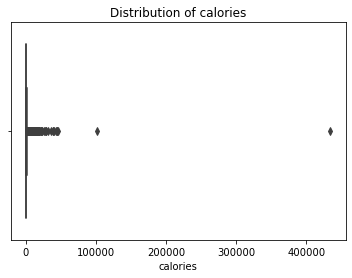

In [41]:
sns.boxplot(x=raw_recipes["calories"]).set(title='Distribution of calories')

[Text(0.5, 1.0, 'Distribution of calories less than 2000')]

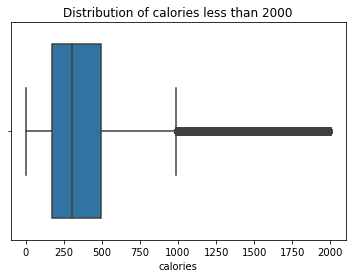

In [44]:
sns.boxplot(x = raw_recipes[raw_recipes["calories"]<=2000]['calories']).set(title='Distribution of calories less than 2000')

[Text(0.5, 1.0, 'relationship between colories and rating')]

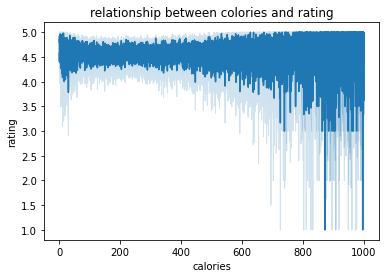

In [77]:
sns.lineplot(data=raw_recipes, x=raw_recipes[raw_recipes["calories"]<=1000]['calories'], y="rating").set(title='relationship between colories and rating')

[Text(0.5, 1.0, 'Distribution of numer of steps')]

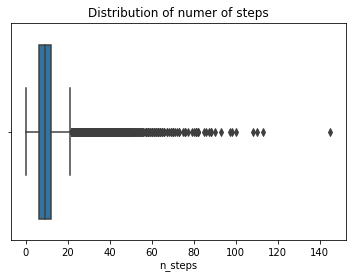

In [58]:
sns.boxplot(x=raw_recipes["n_steps"]).set(title='Distribution of numer of steps')

[Text(0.5, 1.0, 'relationship between number of steps and rating')]

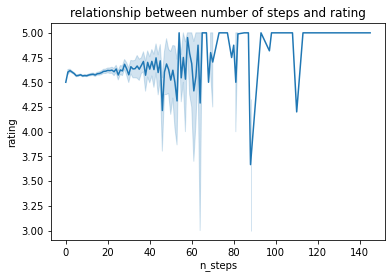

In [78]:
sns.lineplot(data=raw_recipes, x="n_steps", y='rating').set(title='relationship between number of steps and rating')

[Text(0.5, 1.0, 'relationship between carbohydrates and calories')]

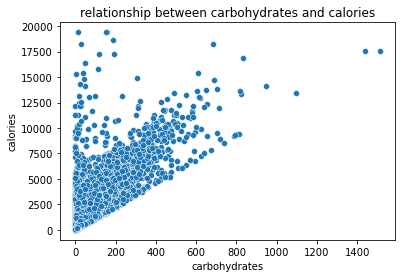

In [79]:
sns.scatterplot(data=raw_recipes, x=raw_recipes['carbohydrates'], y=raw_recipes[raw_recipes['calories']<=20000]['calories']).set(title='relationship between carbohydrates and calories')

[Text(0.5, 1.0, 'relationship between carbohydrates and sodium')]

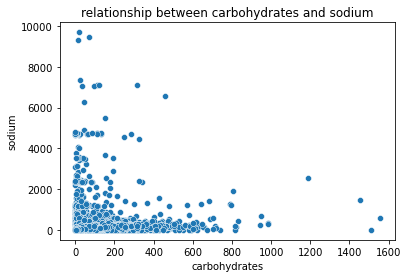

In [80]:
sns.scatterplot(data=raw_recipes, x=raw_recipes[raw_recipes['carbohydrates']<2000]['carbohydrates'], y=raw_recipes[raw_recipes['sodium']<10000]['sodium']).set(title='relationship between carbohydrates and sodium')

##### Hypothesis test/ permutation test
###### H0: The rating for foods with more than 4 steps and the rating for foods with less than 4 steps have the same distribution, and the observed differences in our samples are due to random chance.
###### H1:  The rating for foods with more than 4 steps are higher than the rating for foods with less than 4 steps on average. The observed difference in our samples cannot be explained by random chance alone.
##### We will be using the significant level alpha = 0.05.

In [109]:
observed_difference = raw_recipes[raw_recipes["n_steps"]<4]['rating'].mean() - raw_recipes[raw_recipes["n_steps"]>=4]['rating'].mean()
observed_difference

0.029885866073136036

In [122]:
n_repetitions = 1000

differences = []
for i in range(n_repetitions):
    
    # Step 1: Shuffle the weights and store them in a DataFrame.
    with_shuffled = raw_recipes.assign(Shuffled_rating=np.random.permutation(raw_recipes['rating']))

    # Step 2: Compute the test statistic.
    # Remember, alphabetically, False comes before True,
    # so this computes True - False.
    
    difference = with_shuffled[with_shuffled["n_steps"]<4]['Shuffled_rating'].mean() - with_shuffled[with_shuffled["n_steps"]>=4]['Shuffled_rating'].mean()
    
    # Step 4: Store the result
    differences.append(difference)
    
differences[:10]

[0.006238611490010371,
 0.0026888912508464813,
 0.007271717510549003,
 0.005717915779555938,
 0.0010947570156805142,
 0.008855937493199129,
 -0.004457918063728528,
 -0.005211760569468815,
 0.009734851177759296,
 0.0021521848487306983]

In [123]:
(np.array(differences) >= observed_difference).mean()

0.0

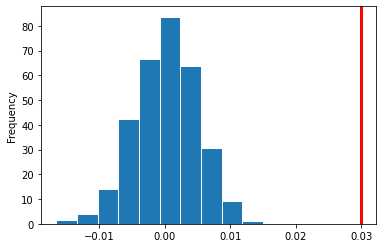

In [124]:
import matplotlib.pyplot as plt
pd.Series(differences).plot(kind='hist', density=True, ec='w', bins=10)
plt.axvline(x=observed_difference, color='red', linewidth=3)

Conclusion: The p-value is 0.0, which is less than 0.05.
Hence we reject the null hypothesis, we cannot conclude that foods with more than 4 steps and the rating for foods with less than 4 steps come from the same distribution..